In [1]:
from LNN import *

# matplotlib settings
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
plt.style.use('ggplot')
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex = True)

# Mutual Info, Linear Stage

In [6]:
def struct_weight_plot(Ns, ks, plot, v = None, nonlinearity = 'squared', s = 1.,
                       sigmaG = 1., sigmaS = 1., sigmaI = 1.):
    # create plot
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    # create data arrays
    data = np.zeros((len(Ns), len(ks)))
    # iterate over scales
    for N_idx, N in enumerate(Ns):
        for k_idx, k in enumerate(ks):
            w = LNN.struct_weight_maker(N, k)
            lnn = LNN(v = v, w = w, N = N, nonlinearity = nonlinearity,
                    sigmaG = sigmaG, sigmaS = sigmaS, sigmaI = sigmaI)
            if plot == 'FI_linear':
                data[N_idx, k_idx] = lnn.FI_linear_stage()
            elif plot == 'MI_linear':
                data[N_idx, k_idx] = lnn.MI_linear_stage()
            elif plot == 'FI_nonlinear':
                data[N_idx, k_idx] = lnn.FI_nonlinear_stage(s)
        ax.plot(ks, data[N_idx, :], label = r'$N=%s$' %N, linewidth=4)
    ax.set_xlabel(r'$k$', fontsize = 30)
    ax.set_xticks(ks)
    ax.tick_params(labelsize=20)
    ax.legend(loc = 4, facecolor = 'white', prop = {'size' : 20})
    return fig, ax

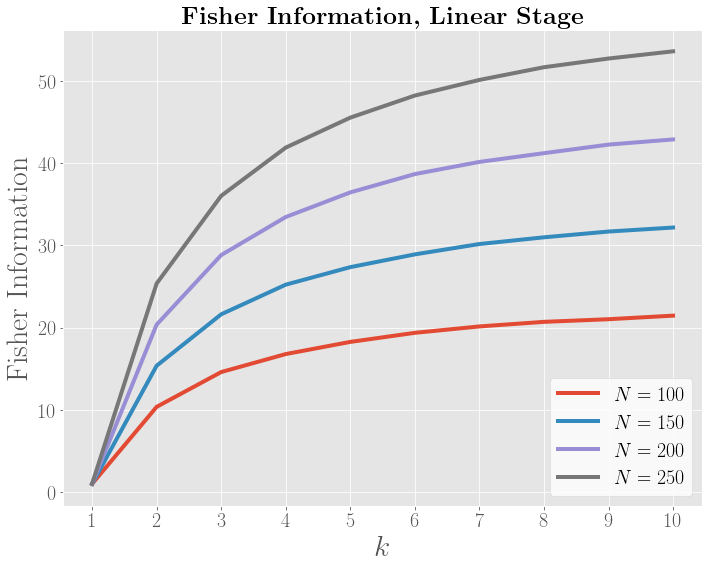

In [14]:
fig, ax = struct_weight_plot([100, 150, 200, 250], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'FI_linear')
ax.set_ylabel(r'Fisher Information', fontsize = 30)
ax.set_title(r'\textbf{Fisher Information, Linear Stage', fontsize = 25)
plt.tight_layout()
plt.savefig('fisher_linear.pdf')
plt.show()

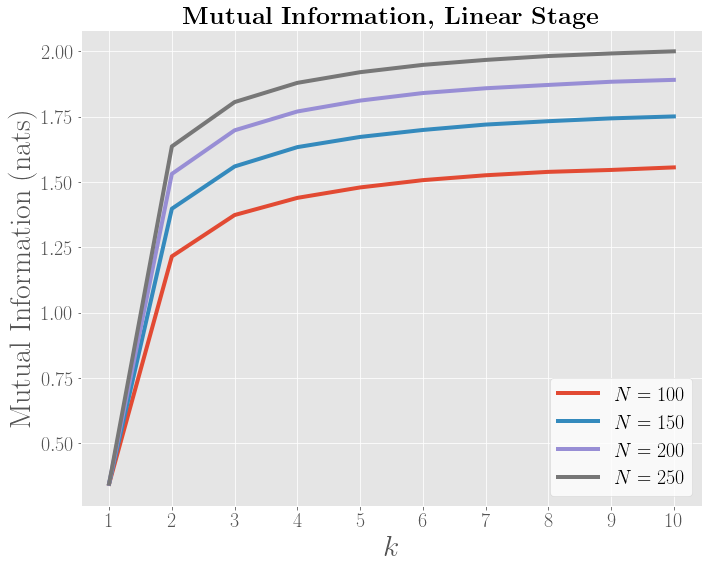

In [13]:
fig, ax = struct_weight_plot([100, 150, 200, 250], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'MI_linear')
ax.set_ylabel(r'Mutual Information (nats)', fontsize = 30)
ax.set_title(r'\textbf{Mutual Information, Linear Stage', fontsize = 25)
plt.tight_layout()
plt.savefig('mutual_linear.pdf')
plt.show()

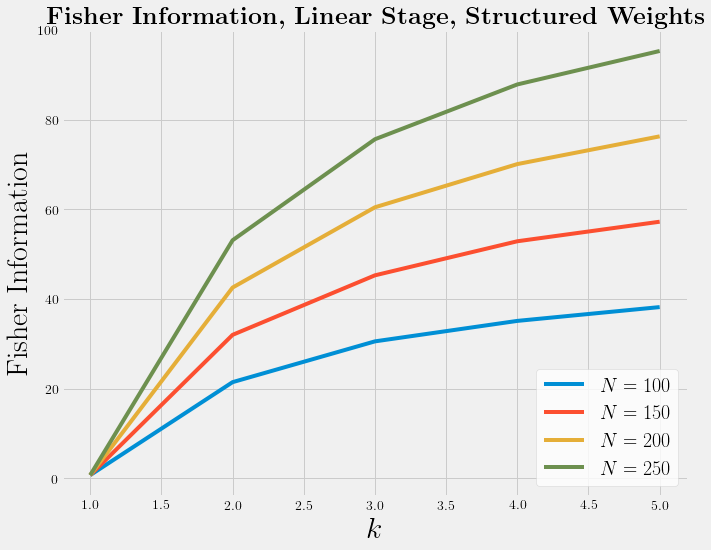

In [22]:
fig, ax = struct_weight_plot([100, 150, 200, 250], [1, 2, 3, 4, 5], 'FI_nonlinear')
ax.set_ylabel(r'Fisher Information', fontsize = 30)
ax.set_title(r'\textbf{Fisher Information, Linear Stage, Structured Weights}', fontsize = 25)
plt.show()

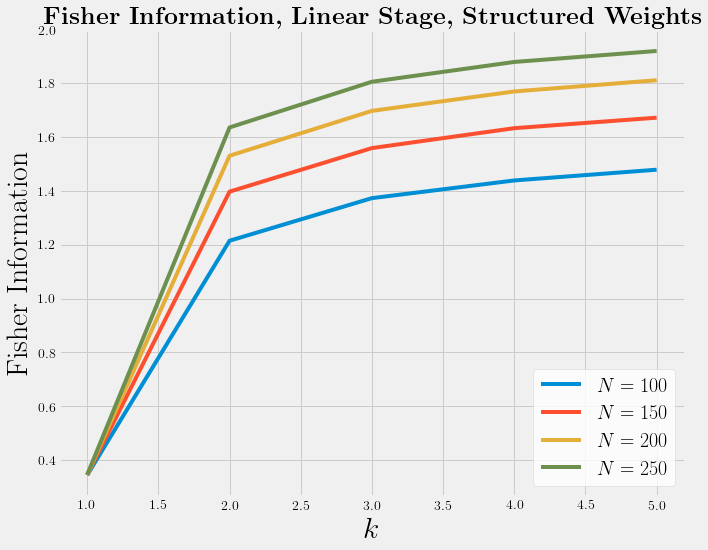

In [23]:
fig, ax = struct_weight_plot([100, 150, 200, 250], [1, 2, 3, 4, 5], 'MI_linear')
ax.set_ylabel(r'Fisher Information', fontsize = 30)
ax.set_title(r'\textbf{Fisher Information, Linear Stage, Structured Weights}', fontsize = 25)
plt.show()

# Unstructured Weights

In [25]:
def unstruct_weight_plot(Ns, scales, repetitions, plot, design = 'lognormal',
                         v = None, sigmaG = 1., sigmaS = 1., sigmaI = 1., nonlinearity = 'squared', s = 1.):
    # create plot
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    # create data arrays
    data = np.zeros((len(Ns), len(scales), repetitions))
    # iterate over scales
    for N_idx, N in enumerate(Ns):
        for scale_idx, scale in enumerate(scales):
        # iterate over repetitions
            for rep in range(repetitions):
                w = 1 + LNN.unstruct_weight_maker(N, design, loc = 0, scale = scale)
                lnn = LNN(v = v, w = w, N = N, nonlinearity = nonlinearity,
                         sigmaG = sigmaG, sigmaS = sigmaS, sigmaI = sigmaI)
                if plot == 'FI_linear':
                    data[N_idx, scale_idx, rep] = lnn.FI_linear_stage()
                elif plot == 'MI_linear':
                    data[N_idx, scale_idx, rep] = lnn.MI_linear_stage()
                elif plot == 'FI_nonlinear':
                    data[N_idx, scale_idx, rep] = lnn.FI_nonlinear_stage(s)
        data_means = np.mean(data[N_idx, :, :], axis = 1)
        data_stdevs = np.std(data[N_idx, :, :], axis = 1)
        ax.plot(scales, data_means, color = 'k', linewidth=4)
        ax.fill_between(scales, data_means - data_stdevs, data_means + data_stdevs,label = r'$N = %s$' %N)
    ax.set_xlabel(r'$\sigma_w$', fontsize = 30)
    ax.legend(loc = 4, facecolor = 'white', prop = {'size' : 20})
    #ax.set_xticks(scales)
    ax.tick_params(labelsize=20)

    return fig, ax

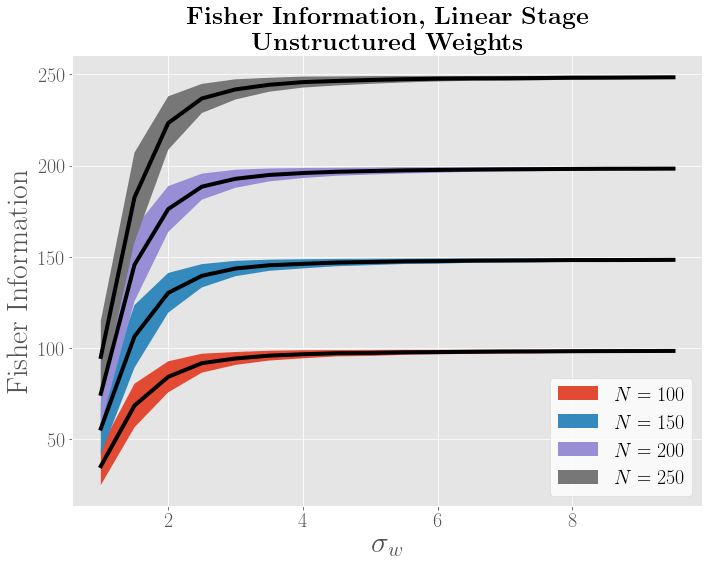

In [27]:
fig, ax = unstruct_weight_plot(Ns = [100, 150, 200, 250], scales = np.arange(1., 10, 0.5), plot = 'FI_linear', repetitions = 1000)
ax.set_ylabel(r'Fisher Information', fontsize = 30)
ax.set_title(r'\textbf{Fisher Information, Linear Stage}' '\n' r'\textbf{Unstructured Weights}', fontsize = 25)
plt.tight_layout()
plt.savefig('fisher_unstruct_linear.pdf')
plt.show()

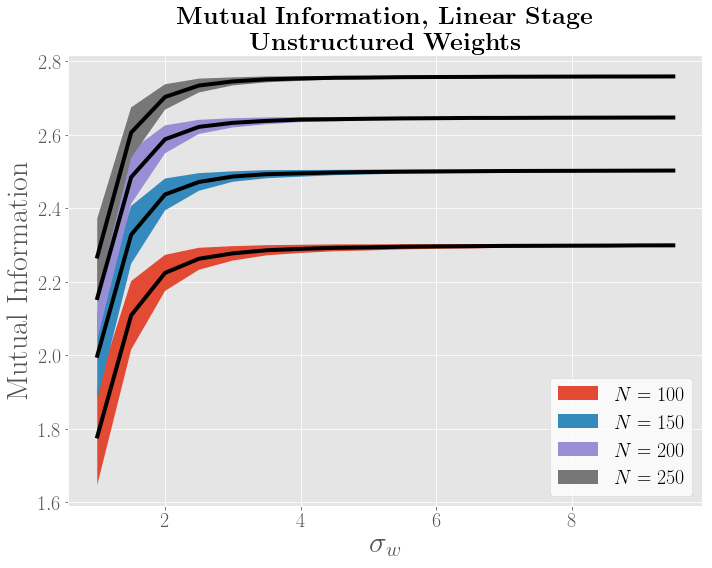

In [29]:
fig, ax = unstruct_weight_plot(Ns = [100, 150, 200, 250], scales = np.arange(1., 10, 0.5), plot = 'MI_linear', repetitions = 1000)
ax.set_ylabel(r'Mutual Information', fontsize = 30)
ax.set_title(r'\textbf{Mutual Information, Linear Stage}' '\n' r'\textbf{Unstructured Weights}', fontsize = 25)
plt.tight_layout()
plt.savefig('mutual_unstruct_linear.pdf')
plt.show()

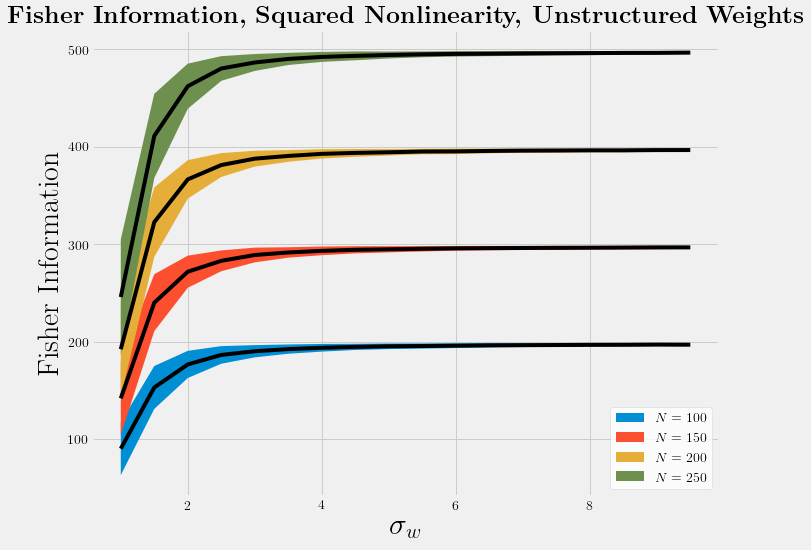

In [57]:
fig, ax = unstruct_weight_plot(Ns = [100, 150, 200, 250], scales = np.arange(1., 10, 0.5), plot = 'FI_nonlinear', repetitions = 1000)
ax.set_ylabel(r'Fisher Information', fontsize = 30)
ax.set_title(r'\textbf{Fisher Information, Squared Nonlinearity, Unstructured Weights}', fontsize = 25)
plt.show()